In [29]:
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


years = np.array([1990, 1993, 1996, 1999, 2002, 2005, 2008, 2011, 2014, 2017, 2020, 2023]).reshape(-1, 1)
population = np.array([20.51, 21.94, 23.22, 24.48, 25.40, 26.36, 27.49, 28.82, 30.22, 31.82, 33.59, 35.65])

X = np.array(years).reshape(-1, 1)
y = np.array(population)



In [30]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1))

In [31]:

model = SVR(kernel='rbf')

param_grid = {
    'C': [1, 10, 100, 1000],
    'epsilon': [0.01, 0.1, 0.2],
    'gamma': [0.001, 0.01, 0.1, 1]
}

In [33]:
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_scaled, y_scaled.ravel())
best_params = grid_search.best_params_
print(f"Eng yaxshi giperparametrlar: {best_params}")

# Yangi SVR modelini eng yaxshi giperparametrlar bilan qayta yaratish
model = SVR(kernel='rbf', C=1000, epsilon=0.01, gamma=0.1)
model.fit(X_scaled, y_scaled.ravel())





Eng yaxshi giperparametrlar: {'C': 1000, 'epsilon': 0.01, 'gamma': 0.1}


SVR(C=1000, epsilon=0.01, gamma=0.1)

In [34]:
model = SVR(kernel='linear')
model.fit(years, population)

input_year = int(input("Qaysi yil uchun aholi sonini bashorat qilmoqchisiz? >>> "))
input_data = np.array([[input_year]])

predicted_population = model.predict(input_data)[0]
print(f"{input_year}-yilda bashorat qilingan aholi soni: {predicted_population:.2f} million kishi")

Qaysi yil uchun aholi sonini bashorat qilmoqchisiz? >>> 2056
2056-yilda bashorat qilingan aholi soni: 47.77 million kishi


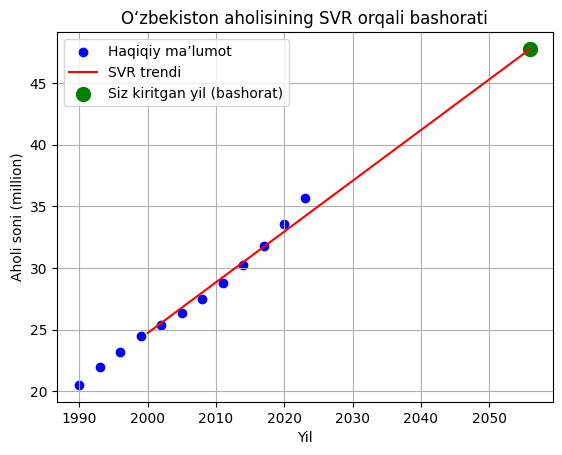

In [35]:
future_years = np.array(range(2000, input_year + 1)).reshape(-1, 1)
plt.scatter(years, population, color='blue', label='Haqiqiy ma’lumot')
plt.plot(future_years, model.predict(future_years), color='red', label='SVR trendi')
plt.scatter(input_year, predicted_population, color='green', s=100, label='Siz kiritgan yil (bashorat)')
plt.xlabel("Yil")
plt.ylabel("Aholi soni (million)")
plt.title("O‘zbekiston aholisining SVR orqali bashorati")
plt.legend()
plt.grid(True)
plt.show()